In [17]:
import graphviz as gr
from graphviz import Digraph
from pathlib import Path

In [18]:
project_path = Path.cwd()
figures_path = project_path / 'figures'
assert figures_path.exists()

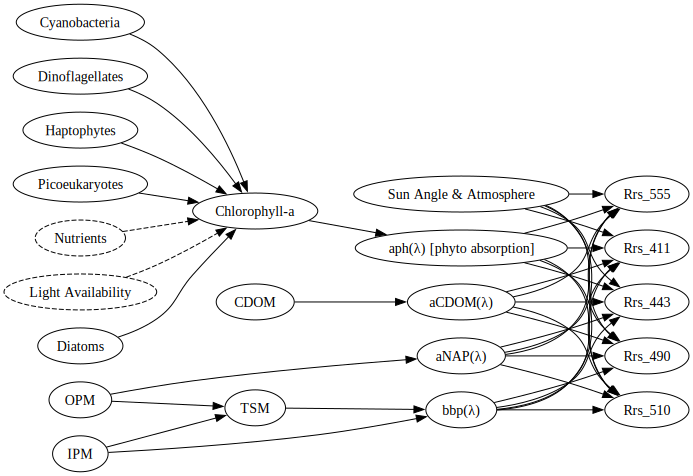

In [6]:

g = Digraph(name="Rrs_CHL_Causal_DAG", graph_attr={"rankdir": "LR"})

# === Biogeochemical Domain ===
phyto_types = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto_types:
    g.node(pt)

g.node("Chlorophyll-a")
for pt in phyto_types:
    g.edge(pt, "Chlorophyll-a")

g.node("CDOM")
g.node("OPM")  # Organic Particulate Matter
g.node("IPM")  # Inorganic Particulate Matter
g.node("TSM")  # Total Suspended Matter

g.edge("OPM", "TSM")
g.edge("IPM", "TSM")

# === Optical Domain ===
g.node("aph(λ)", label="aph(λ) [phyto absorption]")
g.node("aCDOM(λ)", label="aCDOM(λ)")
g.node("aNAP(λ)", label="aNAP(λ)")
g.node("bbp(λ)", label="bbp(λ)")

g.edge("Chlorophyll-a", "aph(λ)")
g.edge("CDOM", "aCDOM(λ)")
g.edge("OPM", "aNAP(λ)")
g.edge("IPM", "bbp(λ)")
g.edge("TSM", "bbp(λ)")

# === Apparent Optical Properties ===
rrs_bands = ["Rrs_411", "Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555"]
for band in rrs_bands:
    g.node(band)
    g.edge("aph(λ)", band)
    g.edge("aCDOM(λ)", band)
    g.edge("aNAP(λ)", band)
    g.edge("bbp(λ)", band)

# === Observation/Measurement Domain ===
#g.node("Measurement Method")
g.node("Sun Angle & Atmosphere")

for band in rrs_bands:
    g.edge("Sun Angle & Atmosphere", band)
    #g.edge("Measurement Method", band)

# === Latent/Contextual Inputs (optional extras) ===
g.node("Nutrients", style="dashed")
g.node("Light Availability", style="dashed")
g.edge("Nutrients", "Chlorophyll-a", style="dashed")
g.edge("Light Availability", "Chlorophyll-a", style="dashed")

g


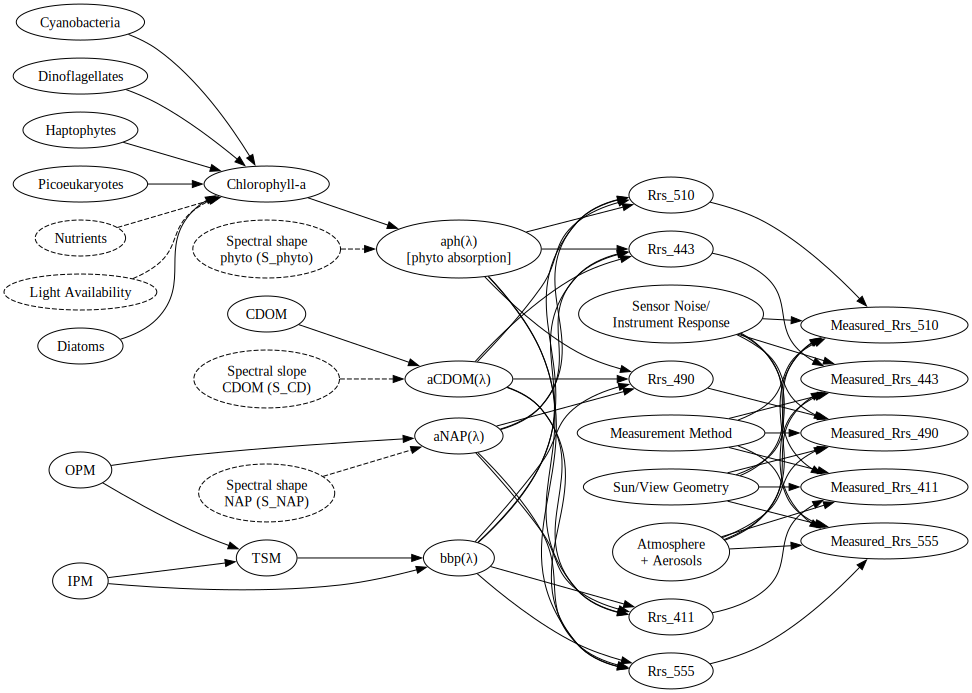

In [7]:
from graphviz import Digraph

g2 = Digraph(name="GIOP_Informed_Causal_Graph", graph_attr={"rankdir": "LR"})

# === Biogeochemical Domain ===
phyto_types = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto_types:
    g2.node(pt)
g2.node("Chlorophyll-a")
for pt in phyto_types:
    g2.edge(pt, "Chlorophyll-a")

g2.node("CDOM")
g2.node("OPM")  # Organic Particulate Matter
g2.node("IPM")  # Inorganic Particulate Matter
g2.node("TSM")
g2.edge("OPM", "TSM")
g2.edge("IPM", "TSM")

# === Optical Domain (IOPs) ===
g2.node("aph(λ)", label="aph(λ)\n[phyto absorption]")
g2.node("aCDOM(λ)")
g2.node("aNAP(λ)")
g2.node("bbp(λ)")

g2.edge("Chlorophyll-a", "aph(λ)")
g2.edge("CDOM", "aCDOM(λ)")
g2.edge("OPM", "aNAP(λ)")
g2.edge("IPM", "bbp(λ)")
g2.edge("TSM", "bbp(λ)")

# Spectral shape parameters (latent)
g2.node("S_CD", style="dashed", label="Spectral slope\nCDOM (S_CD)")
g2.node("S_NAP", style="dashed", label="Spectral shape\nNAP (S_NAP)")
g2.node("S_phyto", style="dashed", label="Spectral shape\nphyto (S_phyto)")
g2.edge("S_CD", "aCDOM(λ)", style="dashed")
g2.edge("S_NAP", "aNAP(λ)", style="dashed")
g2.edge("S_phyto", "aph(λ)", style="dashed")

# === Apparent Optical Properties (AOPs) ===
rrs_bands = ["Rrs_411", "Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555"]
for band in rrs_bands:
    g2.node(band)
    g2.edge("aph(λ)", band)
    g2.edge("aCDOM(λ)", band)
    g2.edge("aNAP(λ)", band)
    g2.edge("bbp(λ)", band)

# === Observation / Sensor Domain ===
g2.node("Sun Geometry", label="Sun/View Geometry")
g2.node("Atmosphere", label="Atmosphere\n+ Aerosols")
g2.node("Sensor", label="Sensor Noise/\nInstrument Response")
g2.node("Measurement Method")

# Measured Rrs nodes and observational effects
for band in rrs_bands:
    measured = f"Measured_{band}"
    g2.node(measured)
    g2.edge(band, measured)
    g2.edge("Sun Geometry", measured)
    g2.edge("Atmosphere", measured)
    g2.edge("Sensor", measured)
    g2.edge("Measurement Method", measured)

# === Latent/Contextual Drivers ===
g2.node("Nutrients", style="dashed")
g2.node("Light Availability", style="dashed")
g2.edge("Nutrients", "Chlorophyll-a", style="dashed")
g2.edge("Light Availability", "Chlorophyll-a", style="dashed")

g2


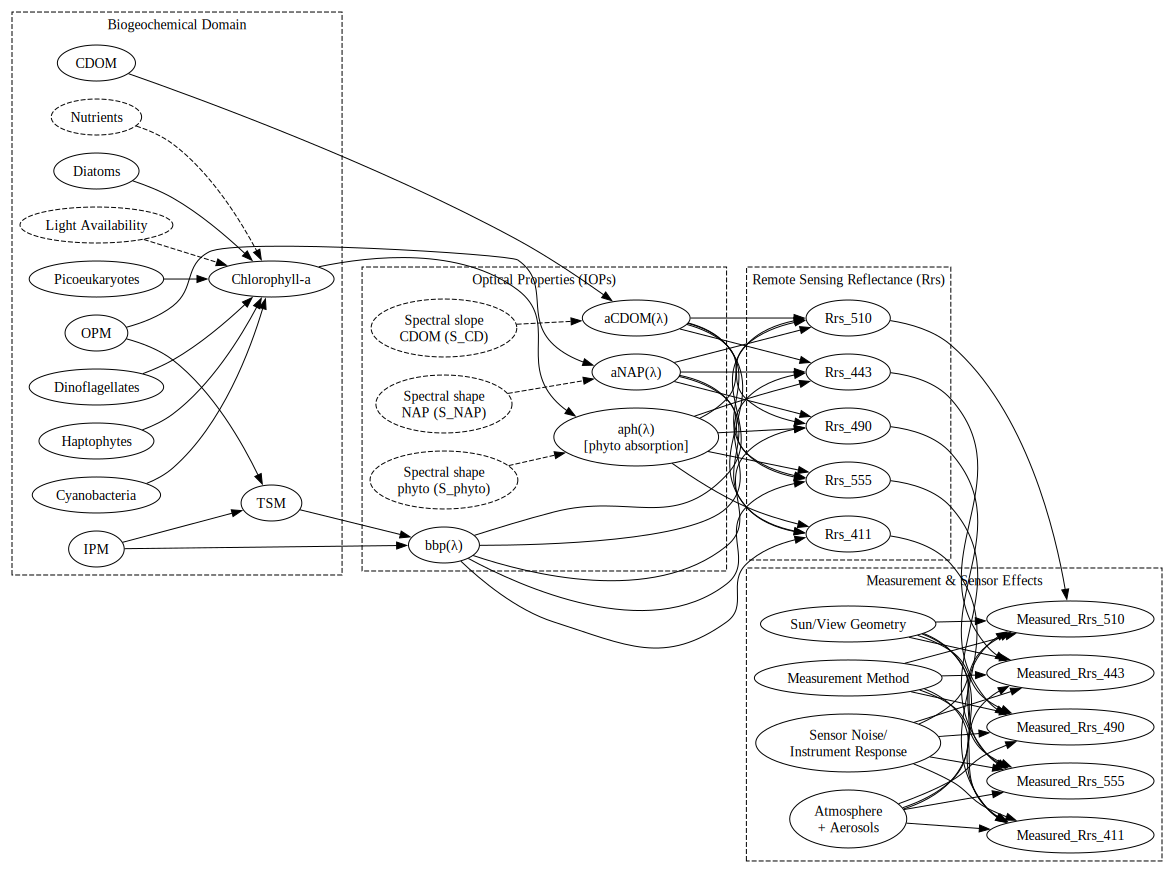

In [8]:

g3 = Digraph(name="GIOP_Causal_Graph", graph_attr={"rankdir": "LR", "splines": "true"})

# === Subgraph: Biogeochemical Domain ===
with g3.subgraph(name='cluster_bio') as bio:
    bio.attr(label="Biogeochemical Domain", style="dashed")
    
    phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
    for p in phyto:
        bio.node(p)
    bio.node("Chlorophyll-a")
    for p in phyto:
        bio.edge(p, "Chlorophyll-a")

    bio.node("CDOM")
    bio.node("OPM")  # Organic Particulate Matter
    bio.node("IPM")  # Inorganic Particulate Matter
    bio.node("TSM")
    bio.edge("OPM", "TSM")
    bio.edge("IPM", "TSM")

    bio.node("Nutrients", style="dashed")
    bio.node("Light Availability", style="dashed")
    bio.edge("Nutrients", "Chlorophyll-a", style="dashed")
    bio.edge("Light Availability", "Chlorophyll-a", style="dashed")

# === Subgraph: Optical Domain (IOPs) ===
with g3.subgraph(name='cluster_iops') as iop:
    iop.attr(label="Optical Properties (IOPs)", style="dashed")

    iop.node("aph(λ)", label="aph(λ)\n[phyto absorption]")
    iop.node("aCDOM(λ)")
    iop.node("aNAP(λ)")
    iop.node("bbp(λ)")

    iop.edge("Chlorophyll-a", "aph(λ)")
    iop.edge("CDOM", "aCDOM(λ)")
    iop.edge("OPM", "aNAP(λ)")
    iop.edge("IPM", "bbp(λ)")
    iop.edge("TSM", "bbp(λ)")

    # Spectral shape (latent)
    iop.node("S_CD", style="dashed", label="Spectral slope\nCDOM (S_CD)")
    iop.node("S_NAP", style="dashed", label="Spectral shape\nNAP (S_NAP)")
    iop.node("S_phyto", style="dashed", label="Spectral shape\nphyto (S_phyto)")
    iop.edge("S_CD", "aCDOM(λ)", style="dashed")
    iop.edge("S_NAP", "aNAP(λ)", style="dashed")
    iop.edge("S_phyto", "aph(λ)", style="dashed")

# === Subgraph: Apparent Optical Properties (AOPs / Rrs) ===
with g3.subgraph(name='cluster_rrs') as rrs:
    rrs.attr(label="Remote Sensing Reflectance (Rrs)", style="dashed")

    bands = ["Rrs_411", "Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555"]
    for b in bands:
        rrs.node(b)
        rrs.edge("aph(λ)", b)
        rrs.edge("aCDOM(λ)", b)
        rrs.edge("aNAP(λ)", b)
        rrs.edge("bbp(λ)", b)

# === Subgraph: Observational Effects ===
with g3.subgraph(name='cluster_obs') as obs:
    obs.attr(label="Measurement & Sensor Effects", style="dashed")

    obs.node("Sun Geometry", label="Sun/View Geometry")
    obs.node("Atmosphere", label="Atmosphere\n+ Aerosols")
    obs.node("Sensor", label="Sensor Noise/\nInstrument Response")
    obs.node("Measurement Method")

    for b in bands:
        measured = f"Measured_{b}"
        obs.node(measured)
        obs.edge(b, measured)
        obs.edge("Sun Geometry", measured)
        obs.edge("Atmosphere", measured)
        obs.edge("Sensor", measured)
        obs.edge("Measurement Method", measured)

g3


In [11]:
g4 = Digraph(name="GIOP_Causal_Graph_Colored", graph_attr={"rankdir": "LR", "splines": "true"})

# === Subgraph: Biogeochemical Domain ===
with g4.subgraph(name='cluster_bio') as bio:
    bio.attr(label="Biogeochemical Domain", style="dashed", color="lightgreen")
    
    phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
    for p in phyto:
        bio.node(p, style="filled", fillcolor="lightgreen")
    bio.node("Chlorophyll-a", style="filled", fillcolor="lightgreen", penwidth="2")

    for p in phyto:
        edge_attrs = {"penwidth": "2"} if p == "Diatoms" else {}
        bio.edge(p, "Chlorophyll-a", **edge_attrs)

    bio.node("CDOM", style="filled", fillcolor="lightgreen")
    bio.node("OPM", style="filled", fillcolor="lightgreen")
    bio.node("IPM", style="filled", fillcolor="lightgreen")
    bio.node("TSM", style="filled", fillcolor="lightgreen")
    bio.edge("OPM", "TSM")
    bio.edge("IPM", "TSM")

    bio.node("Nutrients", style="dashed", color="gray")
    bio.node("Light Availability", style="dashed", color="gray")
    bio.edge("Nutrients", "Chlorophyll-a", style="dashed", color="gray")
    bio.edge("Light Availability", "Chlorophyll-a", style="dashed", color="gray")

# === Subgraph: Optical Domain (IOPs) ===
with g4.subgraph(name='cluster_iops') as iop:
    iop.attr(label="Optical Properties (IOPs)", style="dashed", color="lightblue")

    iop.node("aph(λ)", label="aph(λ)\n[phyto absorption]", style="filled", fillcolor="lightblue", penwidth="2")
    iop.node("aCDOM(λ)", style="filled", fillcolor="lightblue")
    iop.node("aNAP(λ)", style="filled", fillcolor="lightblue")
    iop.node("bbp(λ)", style="filled", fillcolor="lightblue")

    iop.edge("Chlorophyll-a", "aph(λ)", penwidth="2")
    iop.edge("CDOM", "aCDOM(λ)")
    iop.edge("OPM", "aNAP(λ)")
    iop.edge("IPM", "bbp(λ)")
    iop.edge("TSM", "bbp(λ)")

    # Spectral shape (latent)
    iop.node("S_CD", style="dashed", color="gray", label="Spectral slope\nCDOM (S_CD)")
    iop.node("S_NAP", style="dashed", color="gray", label="Spectral shape\nNAP (S_NAP)")
    iop.node("S_phyto", style="dashed", color="gray", label="Spectral shape\nphyto (S_phyto)")
    iop.edge("S_CD", "aCDOM(λ)", style="dashed", color="gray")
    iop.edge("S_NAP", "aNAP(λ)", style="dashed", color="gray")
    iop.edge("S_phyto", "aph(λ)", style="dashed", color="gray")

# === Subgraph: AOPs (Rrs) ===
with g4.subgraph(name='cluster_rrs') as rrs:
    rrs.attr(label="Remote Sensing Reflectance (Rrs)", style="dashed", color="orange")

    bands = ["Rrs_411", "Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555"]
    for b in bands:
        pen = "2" if b == "Rrs_443" else "1"
        rrs.node(b, style="filled", fillcolor="orange", penwidth=pen)
        rrs.edge("aph(λ)", b, penwidth=pen)
        rrs.edge("aCDOM(λ)", b)
        rrs.edge("aNAP(λ)", b)
        rrs.edge("bbp(λ)", b)

# === Subgraph: Observational Domain ===
with g4.subgraph(name='cluster_obs') as obs:
    obs.attr(label="Measurement & Sensor Effects", style="dashed", color="pink")

    obs.node("Sun Geometry", label="Sun/View Geometry", style="filled", fillcolor="pink")
    obs.node("Atmosphere", label="Atmosphere\n+ Aerosols", style="filled", fillcolor="pink")
    obs.node("Sensor", label="Sensor Noise/\nInstrument Response", style="filled", fillcolor="pink")
    obs.node("Measurement Method", style="filled", fillcolor="pink")

    for b in bands:
        measured = f"Measured_{b}"
        pen = "2" if b == "Rrs_443" else "1"
        obs.node(measured, style="filled", fillcolor="pink", penwidth=pen)
        obs.edge(b, measured, penwidth=pen)
        obs.edge("Sun Geometry", measured)
        obs.edge("Atmosphere", measured)
        obs.edge("Sensor", measured)
        obs.edge("Measurement Method", measured)


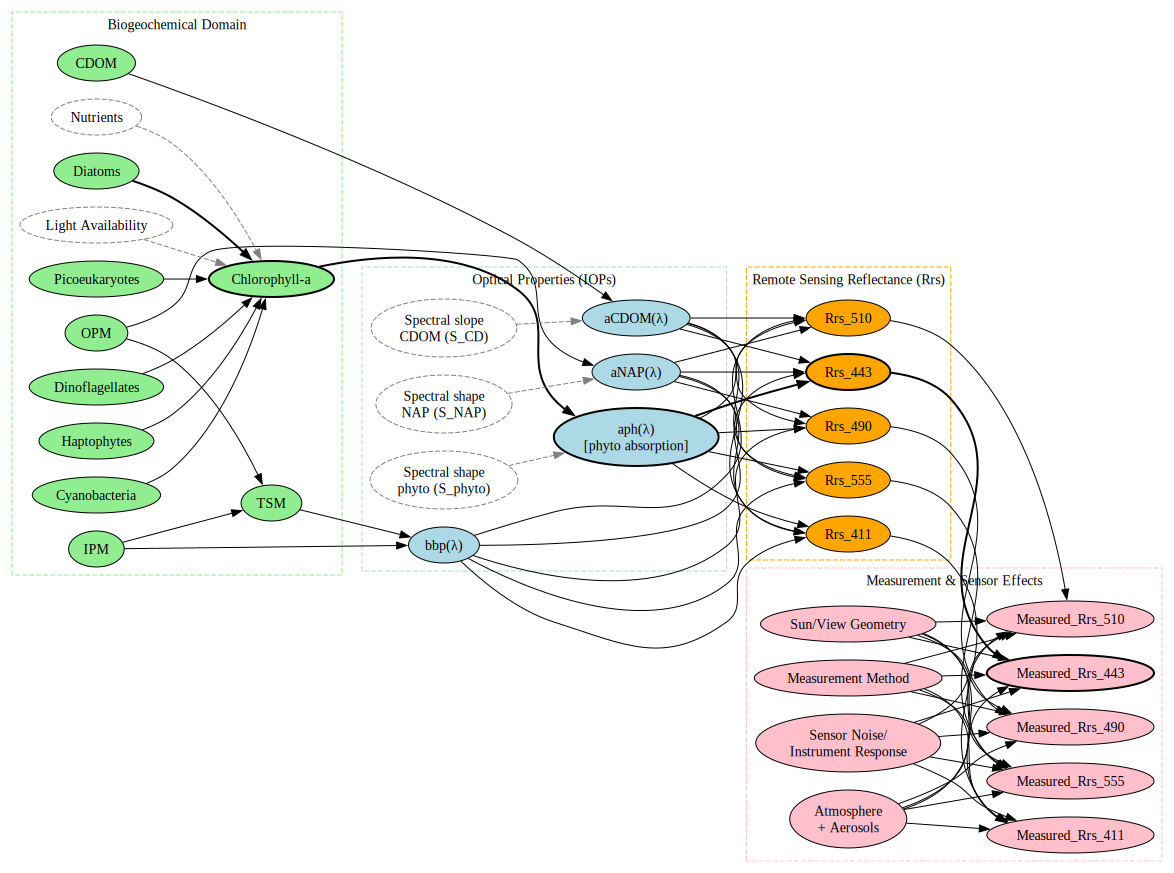

In [12]:
g4

In [23]:
# Create updated graph g5
g5 = Digraph(name="GIOP_Causal_Graph_Expanded", graph_attr={"rankdir": "LR", "splines": "true"})

# Biogeochemical Domain
with g5.subgraph(name='cluster_bio') as bio:
    bio.attr(label="Biogeochemical Domain", style="dashed", color="lightgreen")
    phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
    for p in phyto:
        bio.node(p, style="filled", fillcolor="lightgreen")
    bio.node("Chlorophyll-a", style="filled", fillcolor="lightgreen", penwidth="2")
    for p in phyto:
        edge_attrs = {"penwidth": "2"} if p == "Diatoms" else {}
        bio.edge(p, "Chlorophyll-a", **edge_attrs)
    bio.node("CDOM", style="filled", fillcolor="lightgreen")
    bio.node("OPM", style="filled", fillcolor="lightgreen")
    bio.node("IPM", style="filled", fillcolor="lightgreen")
    bio.node("TSM", style="filled", fillcolor="lightgreen")
    bio.edge("OPM", "TSM")
    bio.edge("IPM", "TSM")
    bio.node("Nutrients", style="dashed", color="gray")
    bio.node("Light Availability", style="dashed", color="gray")
    bio.edge("Nutrients", "Chlorophyll-a", style="dashed", color="gray")
    bio.edge("Light Availability", "Chlorophyll-a", style="dashed", color="gray")

# Optical Properties (IOPs)
with g5.subgraph(name='cluster_iops') as iop:
    iop.attr(label="Optical Properties (IOPs)", style="dashed", color="lightblue")
    iop.node("aph(λ)", label="aph(λ)\n[phyto absorption]", style="filled", fillcolor="lightblue", penwidth="2")
    iop.node("aCDOM(λ)", style="filled", fillcolor="lightblue")
    iop.node("aNAP(λ)", style="filled", fillcolor="lightblue")
    iop.node("bbp(λ)", style="filled", fillcolor="lightblue")
    iop.edge("Chlorophyll-a", "aph(λ)", penwidth="2")
    iop.edge("CDOM", "aCDOM(λ)")
    iop.edge("OPM", "aNAP(λ)")
    iop.edge("IPM", "bbp(λ)")
    iop.edge("TSM", "bbp(λ)")
    iop.node("S_CD", style="dashed", color="gray", label="Spectral slope\nCDOM (S_CD)")
    iop.node("S_NAP", style="dashed", color="gray", label="Spectral shape\nNAP (S_NAP)")
    iop.node("S_phyto", style="dashed", color="gray", label="Spectral shape\nphyto (S_phyto)")
    iop.edge("S_CD", "aCDOM(λ)", style="dashed", color="gray")
    iop.edge("S_NAP", "aNAP(λ)", style="dashed", color="gray")
    iop.edge("S_phyto", "aph(λ)", style="dashed", color="gray")

# Rrs Bands including NIR
with g5.subgraph(name='cluster_rrs') as rrs:
    rrs.attr(label="Remote Sensing Reflectance (Rrs)", style="dashed", color="orange")
    bands = ["Rrs_411", "Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670", "Rrs_765", "Rrs_865"]
    for b in bands:
        pen = "2" if b == "Rrs_443" else "1"
        rrs.node(b, style="filled", fillcolor="orange", penwidth=pen)
        rrs.edge("aph(λ)", b, penwidth=pen if b in ["Rrs_443", "Rrs_670"] else "1")
        rrs.edge("aCDOM(λ)", b)
        rrs.edge("aNAP(λ)", b)
        rrs.edge("bbp(λ)", b)

# Measurement & Sensor Effects
with g5.subgraph(name='cluster_obs') as obs:
    obs.attr(label="Measurement & Sensor Effects", style="dashed", color="pink")
    obs.node("Sun Geometry", label="Sun/View Geometry", style="filled", fillcolor="pink")
    obs.node("Atmosphere", label="Atmosphere\n+ Aerosols", style="filled", fillcolor="pink")
    obs.node("Sensor", label="Sensor Noise/\nInstrument Response", style="filled", fillcolor="pink")
    obs.node("Measurement Method", style="filled", fillcolor="pink")
    for b in bands:
        measured = f"Measured_{b}"
        pen = "2" if b == "Rrs_443" else "1"
        obs.node(measured, style="filled", fillcolor="pink", penwidth=pen)
        obs.edge(b, measured, penwidth=pen)
        obs.edge("Sun Geometry", measured)
        obs.edge("Atmosphere", measured)
        obs.edge("Sensor", measured)
        obs.edge("Measurement Method", measured)

# Export as high-res PDF and PNG
filename = "g5_causal_graph"
g5.render(filename=filename, directory=figures_path, format="pdf", cleanup=True)
g5.render(filename=filename, directory=figures_path, format="png", cleanup=True)

(pdf_path, png_path)


(PosixPath('/Users/erdemkarakoylu/projex/bayesian_chl/figures/g5_causal_graph.pdf'),
 PosixPath('/Users/erdemkarakoylu/projex/bayesian_chl/figures/g5_causal_graph.png'))

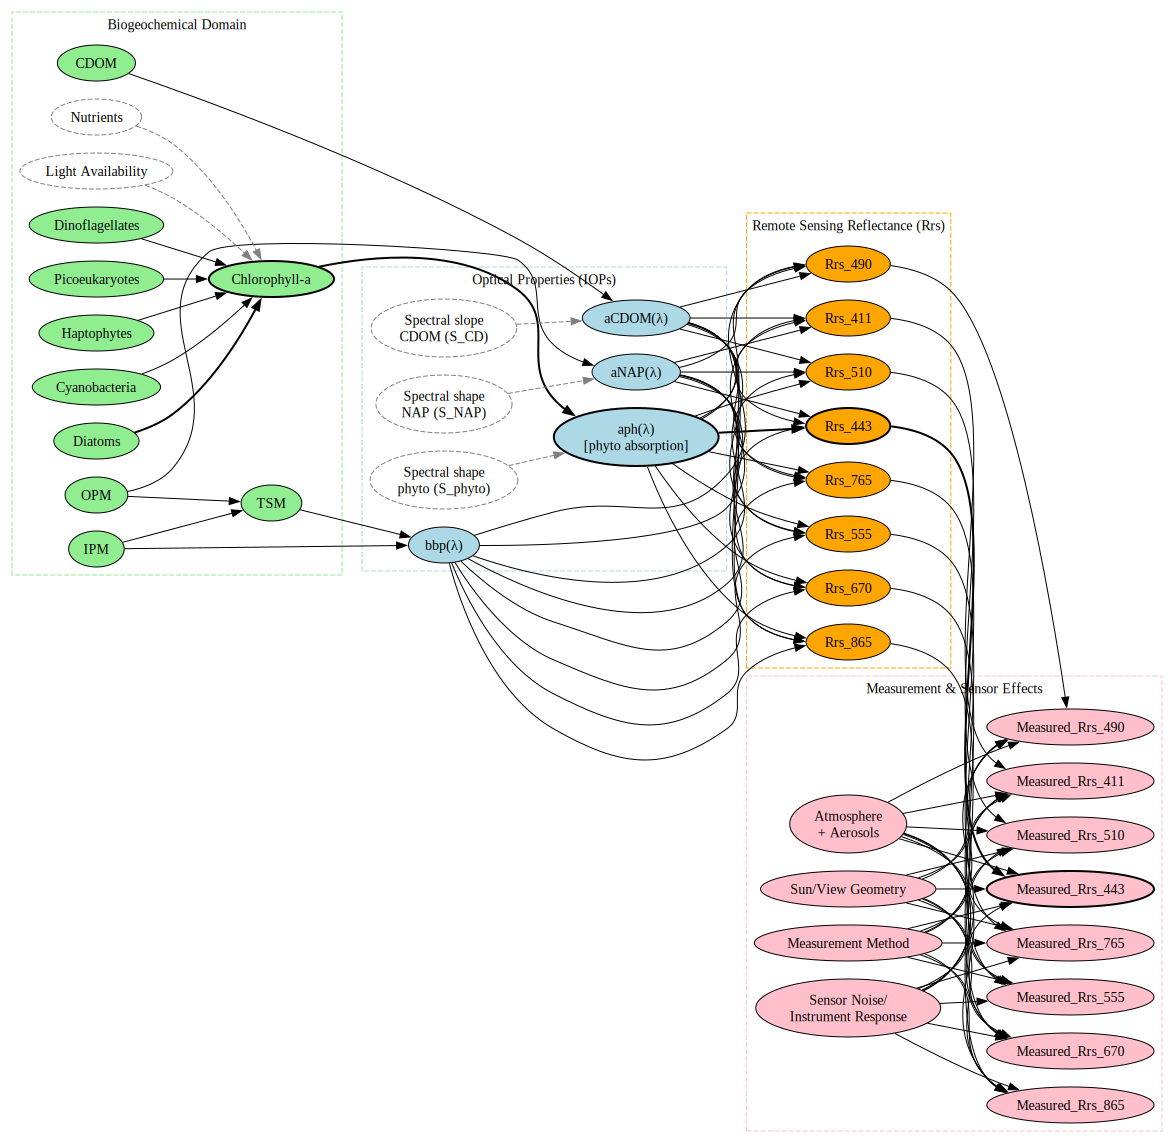

In [16]:
g5

In [32]:
# Create updated graph g7 with full phytoplankton set
g7 = Digraph(name="Refined_Causal_Graph_g7", graph_attr={"rankdir": "LR", "splines": "true"})

# Biogeochemical: full phytoplankton set
phyto_types = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto_types:
    g7.node(pt, style="dashed", fillcolor="lightgreen", color="gray")  # treat as latent/confounders
g7.node("Chlorophyll-a", style="filled", fillcolor="lightgreen", penwidth="2")

for pt in phyto_types:
    g7.edge(pt, "Chlorophyll-a", style="dashed", color="gray")

# Other biogeochemical
g7.node("CDOM", style="filled", fillcolor="lightgreen")
g7.node("OPM", style="filled", fillcolor="lightgreen")
g7.node("IPM", style="filled", fillcolor="lightgreen")
g7.node("TSM", style="filled", fillcolor="lightgreen")
g7.edge("OPM", "TSM")
g7.edge("IPM", "TSM")

# Latent confounders
g7.node("Nutrients", style="dashed", color="gray")
g7.node("Light Availability", style="dashed", color="gray")
g7.edge("Nutrients", "Chlorophyll-a", style="dashed", color="gray")
g7.edge("Light Availability", "Chlorophyll-a", style="dashed", color="gray")

# Optical domain
g7.node("aph(λ)", label="aph(λ)", style="filled", fillcolor="lightblue", penwidth="2")
g7.edge("Chlorophyll-a", "aph(λ)", penwidth="2")

g7.node("aCDOM(λ)", style="filled", fillcolor="lightblue")
g7.node("aNAP(λ)", style="filled", fillcolor="lightblue")
g7.node("bbp(λ)", style="filled", fillcolor="lightblue")
g7.edge("CDOM", "aCDOM(λ)")
g7.edge("OPM", "aNAP(λ)")
g7.edge("IPM", "bbp(λ)")
g7.edge("TSM", "bbp(λ)")

# Connect phytoplankton types to aph as spectral confounders
for pt in phyto_types:
    g7.edge(pt, "aph(λ)", style="dashed", color="gray")

# Rrs bands used
rrs_bands = ["Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g7.node(b, style="filled", fillcolor="orange", penwidth="2" if b == "Rrs_443" else "1")
    g7.edge("aph(λ)", b, penwidth="2" if b == "Rrs_443" else "1")
    g7.edge("aCDOM(λ)", b)
    g7.edge("aNAP(λ)", b)
    g7.edge("bbp(λ)", b)

# Observational nodes
g7.node("Sun Geometry", label="Sun/View Geometry", style="filled", fillcolor="pink")
g7.node("Atmosphere", label="Atmosphere\n+ Aerosols", style="filled", fillcolor="pink")
g7.node("Sensor", label="Sensor Noise/\nInstrument Response", style="filled", fillcolor="pink")
g7.node("Measurement Method", style="filled", fillcolor="pink")

for b in rrs_bands:
    measured = f"Measured_{b}"
    g7.node(measured, style="filled", fillcolor="pink", penwidth="2" if b == "Rrs_443" else "1")
    g7.edge(b, measured, penwidth="2" if b == "Rrs_443" else "1")
    g7.edge("Sun Geometry", measured)
    g7.edge("Atmosphere", measured)
    g7.edge("Sensor", measured)
    g7.edge("Measurement Method", measured)

filename = "g7_causal_graph"
g7.render(filename=filename, directory=figures_path, format="pdf", cleanup=True)
g7.render(filename=filename, directory=figures_path, format="png", cleanup=True)


'/Users/erdemkarakoylu/projex/bayesian_chl/figures/g7_causal_graph.png'

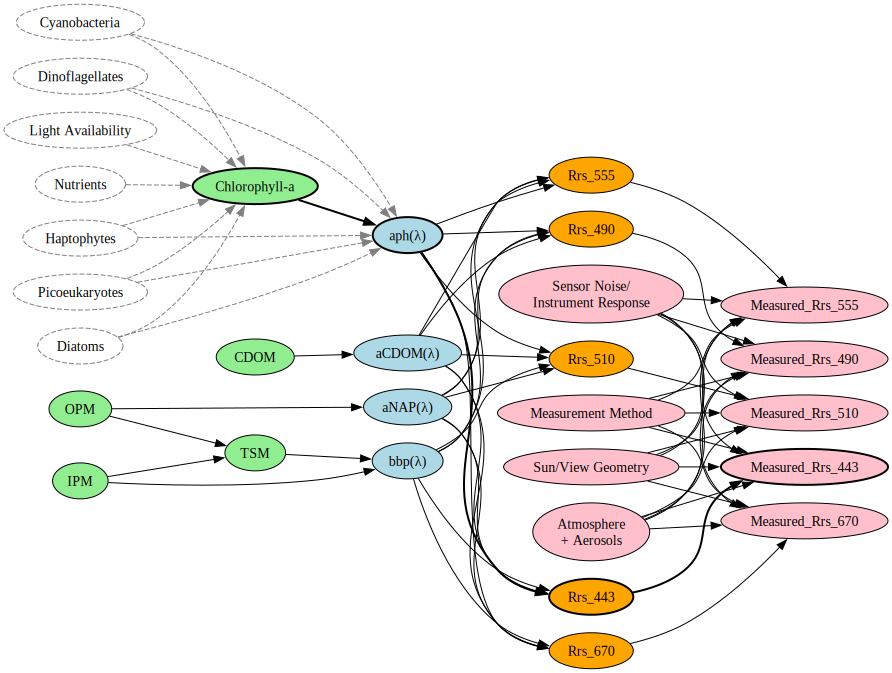

In [30]:
g7

## On "Meanurement Method" and "TSM" nodes:

### 1. “Measurement Method” node
In the observational layer the Measurement Method node captures procedural biases that are distinct from instrument‐noise or atmospheric/geometry effects.

| Typical examples                                                                                                                                                                                                                       | Why it matters for the causal graph                                                                                                                                                                                                                                                                                                                               |
| -------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| • **In-situ Chl-a**: HPLC vs. in-vivo fluorometry vs. spectrophotometry.<br>• **In-situ radiometry**: above-water vs. in-water Rrs protocols.<br>• **Satellite algorithm family**: OCx lookup, GIOP inversion, NN/Bayesian retrievals. | Each method has a characteristic bias/variance structure. For instance, fluorometry often **over-estimates Chl-a at low concentrations**; above-water radiometry may suffer from sky-glint. These systematic effects propagate into the observed ( `Measured_Rrs_λ` ) or observed Chl-a and therefore **confound comparisons unless modelled or calibrated out**. |


Graphically it feeds into every Measured_Rrs_λ node (and, if you collect field Chl-a, would also feed into an “Observed_Chl-a” node). It does not represent the physical sensor response (that’s the Sensor node) but rather the protocol / algorithm layer.

### 2. "Total Suspended Matter" (TSM)


| Optical role                                                                                                                                                                             | Causal placement                                                                                                                                                                                                               |
| ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| • Major source of **particle backscattering** (`bbp(λ)`)—especially the inorganic fraction.<br>• Alters water-leaving radiance even when Chl-a is low (turbid coastal/estuarine waters). | In the graph `OPM → TSM`, `IPM → TSM`, and `TSM → bbp(λ) → Rrs_λ`.  Thus TSM is an **upstream confounder** of the Chl-a → Rrs link: high-TSM water can mimic a high-Chl spectral shape unless backscattering is accounted for. |



Even if your current Bayesian models do not explicitly include TSM, acknowledging it in the DAG reminds you that model residuals may be structured by unmodelled turbidity, and that adding a TSM (or bbp) covariate could reduce bias when you extend to optically-complex (Case-II) waters.

### To conclude:
* Measurement Method = how we obtain the numbers → protocol/algorithm bias.
* TSM = a real water constituent → optical confounder through particle backscattering.

Both nodes remain in the graph because, even if not in your present likelihood, they mark pathways that could bias the Chl-a–Rrs relationship you are modelling.

$→$ Recasting data that is not available as latent variables.

In [33]:
# Create updated graph g8 with observed vs latent labeling
g8 = Digraph(name="Refined_Causal_Graph_g8", graph_attr={"rankdir": "LR", "splines": "true"})

obs_fill = "lightgreen"
latent_fill = "white"

# 1. Phytoplankton types (latent)
phyto_types = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto_types:
    g8.node(pt, style="dashed", color="gray", fillcolor=latent_fill)

# Chlorophyll-a observed
g8.node("Chlorophyll-a", style="filled", fillcolor=obs_fill, penwidth="2")

for pt in phyto_types:
    g8.edge(pt, "Chlorophyll-a", style="dashed", color="gray")

# 2. CDOM, OPM, IPM, TSM latent
for node in ["CDOM", "OPM", "IPM", "TSM"]:
    g8.node(node, style="dashed", color="gray")
g8.edge("OPM", "TSM", style="dashed", color="gray")
g8.edge("IPM", "TSM", style="dashed", color="gray")

# 3. Latent confounders
for node in ["Nutrients", "Light Availability"]:
    g8.node(node, style="dashed", color="gray")
    g8.edge(node, "Chlorophyll-a", style="dashed", color="gray")

# 4. Optical properties latent
for node in ["aph(λ)", "aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
    g8.node(node, style="dashed", color="gray")

g8.edge("Chlorophyll-a", "aph(λ)", style="dashed", color="gray")
g8.edge("CDOM", "aCDOM(λ)", style="dashed", color="gray")
g8.edge("OPM", "aNAP(λ)", style="dashed", color="gray")
g8.edge("IPM", "bbp(λ)", style="dashed", color="gray")
g8.edge("TSM", "bbp(λ)", style="dashed", color="gray")

for pt in phyto_types:
    g8.edge(pt, "aph(λ)", style="dashed", color="gray")

# 5. Rrs bands observed
rrs_bands = ["Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g8.node(b, style="filled", fillcolor="orange", penwidth="2" if b == "Rrs_443" else "1")
    for src in ["aph(λ)", "aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
        g8.edge(src, b, style="dashed", color="gray")

# 6. Observational effects
g8.node("Sun Geometry", style="filled", fillcolor=obs_fill)
g8.node("Atmosphere", style="dashed", color="gray")
g8.node("Sensor", style="filled", fillcolor=obs_fill)
g8.node("Measurement Method", style="filled", fillcolor=obs_fill)

for b in rrs_bands:
    measured = f"Measured_{b}"
    g8.node(measured, style="filled", fillcolor="pink", penwidth="2" if b == "Rrs_443" else "1")
    g8.edge(b, measured)
    g8.edge("Sun Geometry", measured)
    g8.edge("Atmosphere", measured, style="dashed", color="gray")
    g8.edge("Sensor", measured)
    g8.edge("Measurement Method", measured)

# Export
fng8 = 'g8_causal_graph'
g8.render(filename=fng8, format="pdf", cleanup=True)
g8.render(filename=fng8, format="png", cleanup=True)



'g8_causal_graph.png'

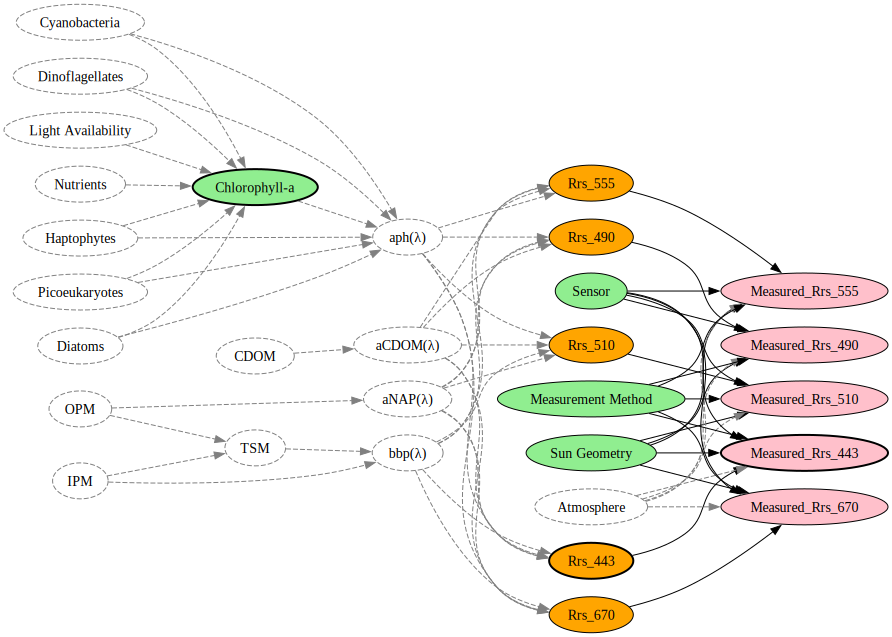

In [34]:
g8

Clarifying edge origins

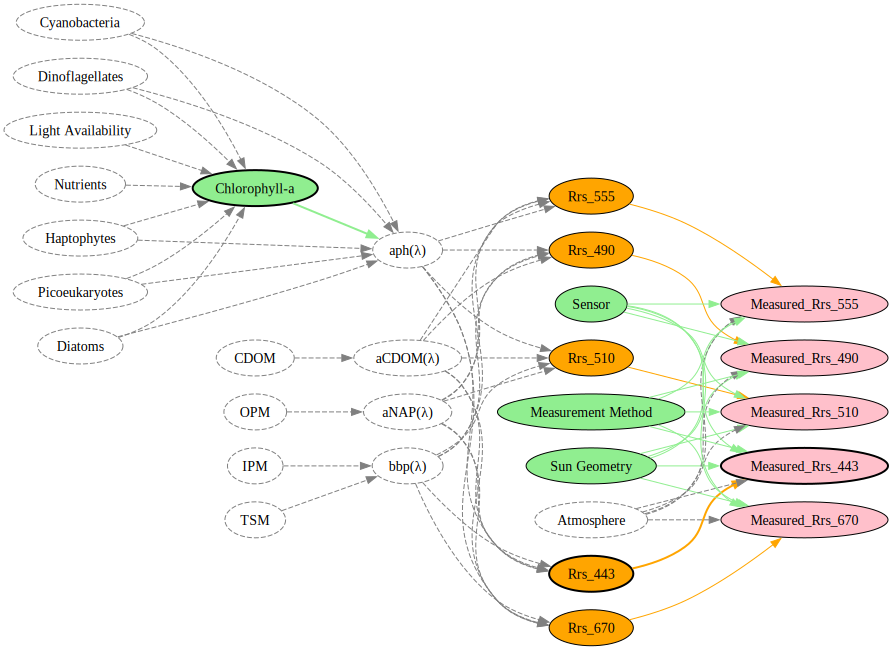

In [35]:
# color palette
green = "lightgreen"
orange = "orange"
pink = "pink"
blue_latent = "gray"     # latent nodes and their edges

# Create graph g9
g9 = Digraph(name="Refined_Causal_Graph_g9", graph_attr={"rankdir": "LR", "splines": "true"})

# --- Nodes ---
# Phytoplankton (latent)
phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto:
    g9.node(pt, style="dashed", color=blue_latent)

# Observed Chl‑a
g9.node("Chlorophyll-a", style="filled", fillcolor=green, penwidth="2")

# Latent biogeochemical
for node in ["CDOM", "OPM", "IPM", "TSM"]:
    g9.node(node, style="dashed", color=blue_latent)

# Latent confounders
for node in ["Nutrients", "Light Availability"]:
    g9.node(node, style="dashed", color=blue_latent)

# Latent optical properties
opt_props = ["aph(λ)", "aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]
for node in opt_props:
    g9.node(node, style="dashed", color=blue_latent)

# Observed Rrs bands
rrs_bands = ["Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g9.node(b, style="filled", fillcolor=orange, penwidth="2" if b == "Rrs_443" else "1")

# Observational nodes
g9.node("Sun Geometry", style="filled", fillcolor=green)
g9.node("Atmosphere", style="dashed", color=blue_latent)
g9.node("Sensor", style="filled", fillcolor=green)
g9.node("Measurement Method", style="filled", fillcolor=green)

# Measured Rrs nodes
for b in rrs_bands:
    g9.node(f"Measured_{b}", style="filled", fillcolor=pink, penwidth="2" if b == "Rrs_443" else "1")

# --- Edges with source-colored edges ---
# helper to add edge with color matching source
def add_edge(src, dst, dashed=False, width="1"):
    style = "dashed" if dashed else "solid"
    color = blue_latent if dashed else g9.node_attr.get("fillcolor", green)
    g9.edge(src, dst, color=color, style=style, penwidth=width)

# Phytoplankton → Chlorophyll‑a
for pt in phyto:
    g9.edge(pt, "Chlorophyll-a", color=blue_latent, style="dashed")

# Latent confounders
for node in ["Nutrients", "Light Availability"]:
    g9.edge(node, "Chlorophyll-a", color=blue_latent, style="dashed")

# Chl‑a → aph (observed green)
g9.edge("Chlorophyll-a", "aph(λ)", color=green, penwidth="2")

# CDOM/OPM/IPM/TSM → optical properties
g9.edge("CDOM", "aCDOM(λ)", color=blue_latent, style="dashed")
g9.edge("OPM", "aNAP(λ)", color=blue_latent, style="dashed")
g9.edge("IPM", "bbp(λ)", color=blue_latent, style="dashed")
g9.edge("TSM", "bbp(λ)", color=blue_latent, style="dashed")

# Phytoplankton → aph link
for pt in phyto:
    g9.edge(pt, "aph(λ)", color=blue_latent, style="dashed")

# Optical properties → Rrs (edges colored gray dashed)
for b in rrs_bands:
    for src in opt_props:
        g9.edge(src, b, color=blue_latent, style="dashed")

# Rrs → Measured_Rrs edges colored orange
for b in rrs_bands:
    g9.edge(b, f"Measured_{b}", color=orange, penwidth="2" if b == "Rrs_443" else "1")

# Observational nodes into Measured_Rrs
for b in rrs_bands:
    tgt = f"Measured_{b}"
    g9.edge("Sun Geometry", tgt, color=green)
    g9.edge("Sensor", tgt, color=green)
    g9.edge("Measurement Method", tgt, color=green)
    g9.edge("Atmosphere", tgt, color=blue_latent, style="dashed")

# Export
fng9 = "g9_causal_graph"
g9.render(filename=fng9, format="pdf", cleanup=True)
g9.render(filename=fng9, format="png", cleanup=True)

g9

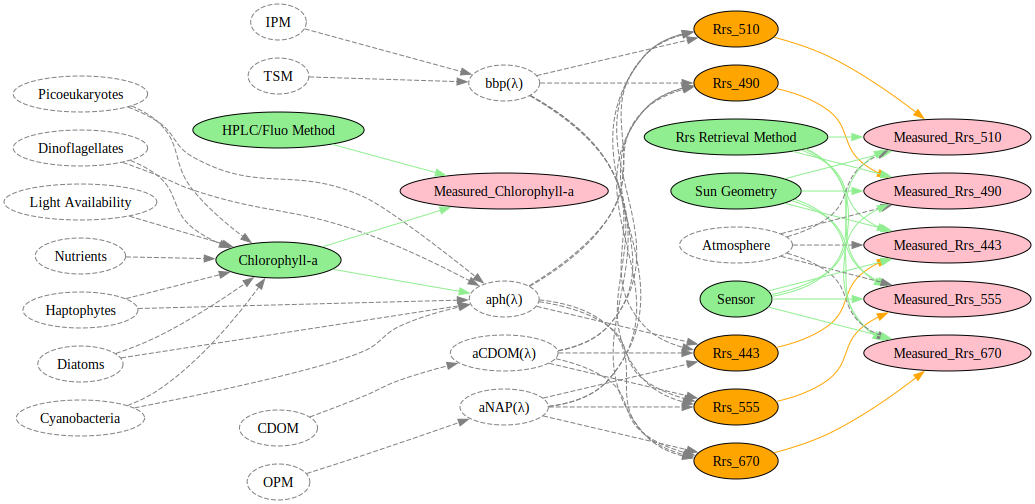

In [37]:
# Colors
green = "lightgreen"
orange = "orange"
pink = "pink"
gray_latent = "gray"

# Create g11
g11 = Digraph(name="Refined_Causal_Graph_g11", graph_attr={"rankdir": "LR", "splines": "true"})

# ---- Nodes ----
# Latent phytoplankton
phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto:
    g11.node(pt, style="dashed", color=gray_latent)

# Observed Chl‑a & measured Chl‑a
g11.node("Chlorophyll-a", style="filled", fillcolor=green)
g11.node("Measured_Chlorophyll-a", style="filled", fillcolor=pink)

# Chlorophyll measurement method (HPLC / Fluo)
g11.node("HPLC/Fluo Method", style="filled", fillcolor=green)

# Other latent biogeochemical
for node in ["CDOM", "OPM", "IPM", "TSM", "Nutrients", "Light Availability"]:
    g11.node(node, style="dashed", color=gray_latent)

# Latent optical props
opt_props = ["aph(λ)", "aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]
for node in opt_props:
    g11.node(node, style="dashed", color=gray_latent)

# Rrs bands observed
rrs_bands = ["Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g11.node(b, style="filled", fillcolor=orange)

# Rrs retrieval measurement method (algorithm)
g11.node("Rrs Retrieval Method", style="filled", fillcolor=green)

# Observational nodes
g11.node("Sun Geometry", style="filled", fillcolor=green)
g11.node("Atmosphere", style="dashed", color=gray_latent)
g11.node("Sensor", style="filled", fillcolor=green)

# Measured Rrs nodes
for b in rrs_bands:
    g11.node(f"Measured_{b}", style="filled", fillcolor=pink)

# ---- Edges (uniform) ----
def edge(src, dst, dashed=False, color="black"):
    style = "dashed" if dashed else "solid"
    g11.edge(src, dst, style=style, color=color, penwidth="1")

# Phytoplankton -> Chl‑a & aph
for pt in phyto:
    edge(pt, "Chlorophyll-a", dashed=True, color=gray_latent)
    edge(pt, "aph(λ)", dashed=True, color=gray_latent)

# Confounders -> Chl‑a
for conf in ["Nutrients", "Light Availability"]:
    edge(conf, "Chlorophyll-a", dashed=True, color=gray_latent)

# Chl‑a path
edge("Chlorophyll-a", "aph(λ)", color=green)
edge("Chlorophyll-a", "Measured_Chlorophyll-a", color=green)
edge("HPLC/Fluo Method", "Measured_Chlorophyll-a", color=green)

# Biogeochemical to optical
edge("CDOM", "aCDOM(λ)", dashed=True, color=gray_latent)
edge("OPM", "aNAP(λ)", dashed=True, color=gray_latent)
edge("IPM", "bbp(λ)", dashed=True, color=gray_latent)
edge("TSM", "bbp(λ)", dashed=True, color=gray_latent)

# Optical to Rrs
for b in rrs_bands:
    for src in opt_props:
        edge(src, b, dashed=True, color=gray_latent)

# Rrs to Measured_Rrs and observational effects
for b in rrs_bands:
    measured = f"Measured_{b}"
    edge(b, measured, color=orange)
    edge("Sun Geometry", measured, color=green)
    edge("Sensor", measured, color=green)
    edge("Rrs Retrieval Method", measured, color=green)
    edge("Atmosphere", measured, dashed=True, color=gray_latent)

# Export
fng11 = 'g11_causal_graph'
g11.render(filename=fng11, format="pdf", cleanup=True)
g11.render(filename=fng11, format="png", cleanup=True)

g11

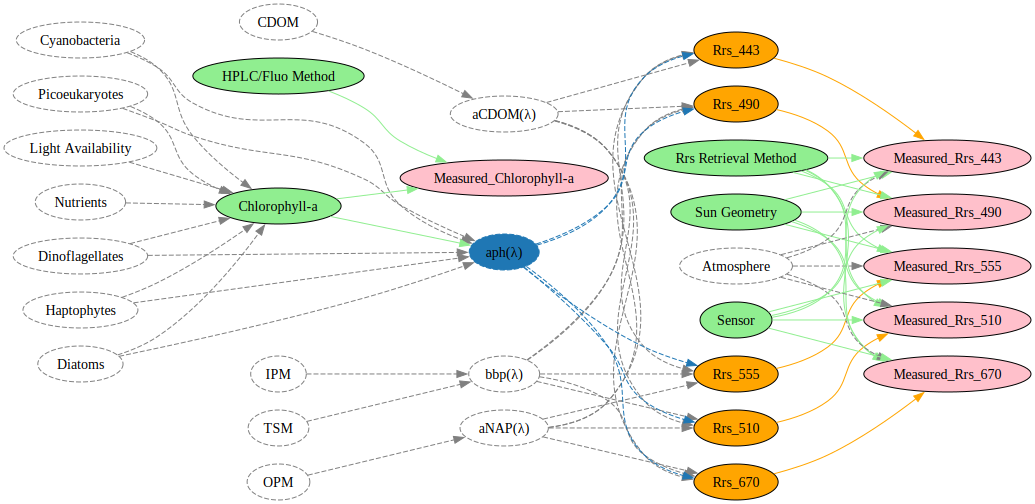

In [ ]:
# Colors
green = "lightgreen"
orange = "orange"
pink = "pink"
gray_latent = "gray"
brown = "brown"
blue_aph = "#1f77b4"  # distinct color for aph node and its outgoing edges

# Create g12
g12 = Digraph(name="Refined_Causal_Graph_g12", graph_attr={"rankdir": "LR", "splines": "true"})

# ----- Nodes -----
# Latent phytoplankton
phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto:
    g12.node(pt, style="dashed", color=gray_latent)

# Observed chlorophyll and measured
g12.node("Chlorophyll-a", style="filled", fillcolor=green)
g12.node("Measured_Chlorophyll-a", style="filled", fillcolor=pink)

# Chlorophyll measurement method
g12.node("HPLC/Fluo Method", style="filled", fillcolor=green)

# Latent biogeochemical
for node in ["CDOM", "OPM", "IPM", "TSM", "Nutrients", "Light Availability"]:
    g12.node(node, style="dashed", color=gray_latent)

# Latent optical props, but aph gets special color
for node in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
    g12.node(node, style="dashed", color=gray_latent)

# aph latent but colored
g12.node("aph(λ)", style="dashed,filled", fillcolor=blue_aph, color=blue_aph)

# Rrs observed
rrs_bands = ["Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g12.node(b, style="filled", fillcolor=orange)

# Rrs retrieval method
g12.node("Rrs Retrieval Method", style="filled", fillcolor=green)

# Observational nodes
g12.node("Sun Geometry", style="filled", fillcolor=green)
g12.node("Atmosphere", style="dashed", color=gray_latent)
g12.node("Sensor", style="filled", fillcolor=green)

# Measured Rrs nodes
for b in rrs_bands:
    g12.node(f"Measured_{b}", style="filled", fillcolor=pink)

# ----- Helper edge function -----
def edge(src, dst, dashed=False, color="black"):
    style = "dashed" if dashed else "solid"
    g12.edge(src, dst, style=style, color=color, penwidth="1")

# Phytoplankton edges
for pt in phyto:
    edge(pt, "Chlorophyll-a", dashed=True, color=gray_latent)
    edge(pt, "aph(λ)", dashed=True, color=gray_latent)

# Confounders -> Chl
for conf in ["Nutrients", "Light Availability"]:
    edge(conf, "Chlorophyll-a", dashed=True, color=gray_latent)

# Chl paths
edge("Chlorophyll-a", "aph(λ)", color=green)
edge("Chlorophyll-a", "Measured_Chlorophyll-a", color=green)
edge("HPLC/Fluo Method", "Measured_Chlorophyll-a", color=green)

# Biogeochemical to optical
edge("CDOM", "aCDOM(λ)", dashed=True, color=gray_latent)
edge("OPM", "aNAP(λ)", dashed=True, color=gray_latent)
edge("IPM", "bbp(λ)", dashed=True, color=gray_latent)
edge("TSM", "bbp(λ)", dashed=True, color=gray_latent)

# Optical props to Rrs
for b in rrs_bands:
    # outgoing edges from aph colored blue
    edge("aph(λ)", b, dashed=True, color=blue_aph)
    # others remain gray
    for src in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
        edge(src, b, dashed=True, color=gray_latent)

# Rrs to measured
for b in rrs_bands:
    measured = f"Measured_{b}"
    edge(b, measured, color=orange)
    edge("Sun Geometry", measured, color=green)
    edge("Sensor", measured, color=brown)
    edge("Rrs Retrieval Method", measured, color=brown)
    edge("Atmosphere", measured, dashed=True, color=gray_latent)

# Export
fng12 = "g12_causal_graph.png"
g12.render(filename=fng12, format="pdf", cleanup=True)
g12.render(filename=fng12, format="png", cleanup=True)

g12

In [43]:
# Colors
green = "lightgreen"
orange = "orange"
pink = "pink"
gray_latent = "gray"
blue_aph = "#1f77b4"  # blue for aph perimeter and outgoing edges

# Create g13
g13 = Digraph(name="Refined_Causal_Graph_g13", graph_attr={"rankdir": "LR", "splines": "true"})

# ----- Nodes -----
# Latent phytoplankton
phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto:
    g13.node(pt, style="dashed", color=gray_latent)

# Observed chlorophyll and measured
g13.node("Chlorophyll-a", style="filled", fillcolor=green)
g13.node("Measured_Chlorophyll-a", style="filled", fillcolor=pink)

# Chlorophyll measurement method
g13.node("HPLC/Fluo Method", style="filled", fillcolor=green)

# Latent biogeochemical
for node in ["CDOM", "OPM", "IPM", "TSM", "Nutrients", "Light Availability"]:
    g13.node(node, style="dashed", color=gray_latent)

# Other latent optical props
for node in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
    g13.node(node, style="dashed", color=gray_latent)

# aph latent with blue dashed border, no fill
g13.node("aph(λ)", style="dashed", color=blue_aph)

# Rrs observed
rrs_bands = ["Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g13.node(b, style="filled", fillcolor=orange)

# Rrs retrieval method
g13.node("Rrs Retrieval Method", style="filled", fillcolor=green)

# Observational nodes
g13.node("Sun Geometry", style="filled", fillcolor=green)
g13.node("Atmosphere", style="dashed", color=gray_latent)
g13.node("Sensor", style="filled", fillcolor=green)

# Measured Rrs nodes
for b in rrs_bands:
    g13.node(f"Measured_{b}", style="filled", fillcolor=pink)

# ----- Helper edge function -----
def edge(src, dst, dashed=False, color="black"):
    style = "dashed" if dashed else "solid"
    g13.edge(src, dst, style=style, color=color, penwidth="1")

# Phytoplankton edges
for pt in phyto:
    edge(pt, "Chlorophyll-a", dashed=True, color=gray_latent)
    edge(pt, "aph(λ)", dashed=True, color=gray_latent)

# Confounders -> Chl
for conf in ["Nutrients", "Light Availability"]:
    edge(conf, "Chlorophyll-a", dashed=True, color=gray_latent)

# Chl paths
edge("Chlorophyll-a", "aph(λ)", color=green)
edge("Chlorophyll-a", "Measured_Chlorophyll-a", color=green)
edge("HPLC/Fluo Method", "Measured_Chlorophyll-a", color=green)

# Biogeochemical to optical
edge("CDOM", "aCDOM(λ)", dashed=True, color=gray_latent)
edge("OPM", "aNAP(λ)", dashed=True, color=gray_latent)
edge("IPM", "bbp(λ)", dashed=True, color=gray_latent)
edge("TSM", "bbp(λ)", dashed=True, color=gray_latent)

# Optical props to Rrs
for b in rrs_bands:
    # outgoing edges from aph colored blue
    edge("aph(λ)", b, dashed=True, color=blue_aph)
    # others remain gray
    for src in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
        edge(src, b, dashed=True, color=gray_latent)

# Rrs to measured
for b in rrs_bands:
    measured = f"Measured_{b}"
    edge(b, measured, color=orange)
    edge("Sun Geometry", measured, color=green)
    edge("Sensor", measured, color=green)
    edge("Rrs Retrieval Method", measured, color=green)
    edge("Atmosphere", measured, dashed=True, color=gray_latent)

# Export
#pdf_g13 = "/mnt/data/g13_causal_graph.pdf"
#png_g13 = "/mnt/data/g13_causal_graph.png"
#g13.render(filename=pdf_g13, format="pdf", cleanup=True)
#g13.render(filename=png_g13, format="png", cleanup=True)

#(pdf_g13, png_g13)


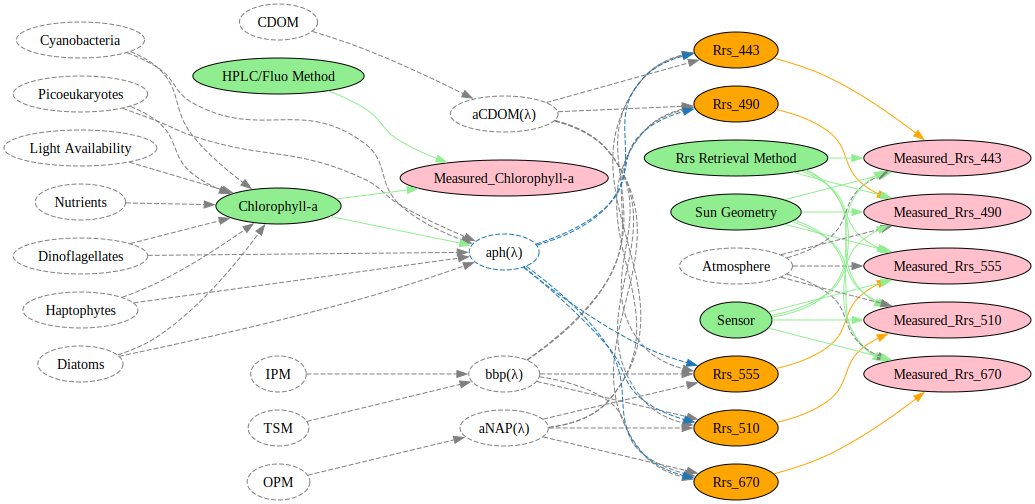

In [44]:
g13

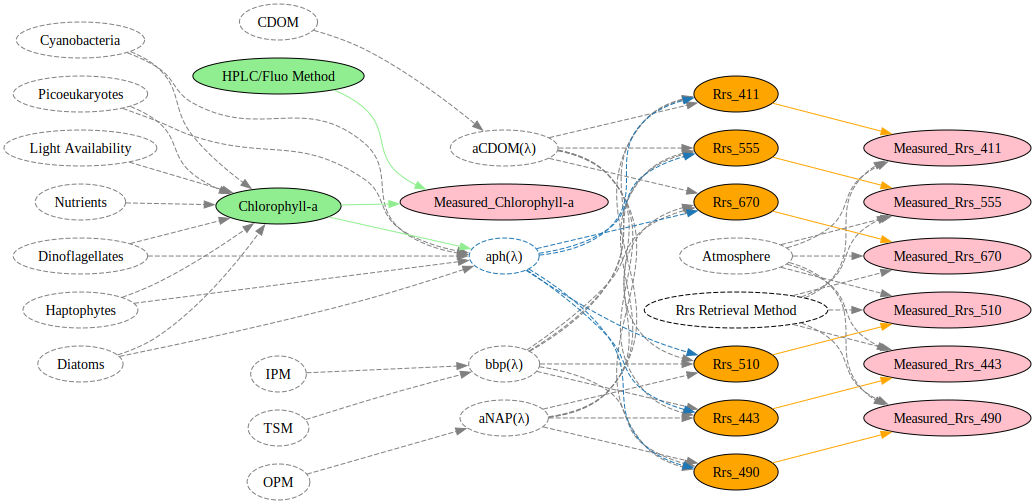

In [51]:
# Colors
green = "lightgreen"
orange = "orange"
pink = "pink"
gray_latent = "gray"
blue_aph = "#1f77b4"
brown = "brown"

# Create g14
g14 = Digraph(name="Refined_Causal_Graph_g14", graph_attr={"rankdir": "LR", "splines": "true"})

# ----- Nodes -----
# Latent phytoplankton
phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto:
    g14.node(pt, style="dashed", color=gray_latent)

# Observed chlorophyll and measured
g14.node("Chlorophyll-a", style="filled", fillcolor=green)
g14.node("Measured_Chlorophyll-a", style="filled", fillcolor=pink)

# Chlorophyll measurement method
g14.node("HPLC/Fluo Method", style="filled", fillcolor=green)

# Latent biogeochemical
latent_bio = ["CDOM", "OPM", "IPM", "TSM", "Nutrients", "Light Availability"]
for node in latent_bio:
    g14.node(node, style="dashed", color=gray_latent)

# Other latent optical props
for node in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
    g14.node(node, style="dashed", color=gray_latent)

# aph latent with blue outline
g14.node("aph(λ)", style="dashed", color=blue_aph)

# Rrs bands observed, now including 411
rrs_bands = ["Rrs_411", "Rrs_443", "Rrs_490", "Rrs_510", "Rrs_555", "Rrs_670"]
for b in rrs_bands:
    g14.node(b, style="filled", fillcolor=orange)

# Rrs retrieval method
g14.node("Rrs Retrieval Method", style="dashed", fillcolor=gray_latent)

# Observational nodes
#g14.node("Sun Geometry", style="dashed", fillcolor=green)
g14.node("Atmosphere", style="dashed", color=gray_latent)
#g14.node("Sensor", style="dashed", fillcolor=green)

# Measured Rrs nodes
for b in rrs_bands:
    g14.node(f"Measured_{b}", style="filled", fillcolor=pink)

# ----- Helper edge function -----
def edge(src, dst, dashed=False, color="black"):
    style = "dashed" if dashed else "solid"
    g14.edge(src, dst, style=style, color=color, penwidth="1")

# Phytoplankton edges
for pt in phyto:
    edge(pt, "Chlorophyll-a", dashed=True, color=gray_latent)
    edge(pt, "aph(λ)", dashed=True, color=gray_latent)

# Confounders -> Chl
for conf in ["Nutrients", "Light Availability"]:
    edge(conf, "Chlorophyll-a", dashed=True, color=gray_latent)

# Chl paths
edge("Chlorophyll-a", "aph(λ)", color=green)
edge("Chlorophyll-a", "Measured_Chlorophyll-a", color=green)
edge("HPLC/Fluo Method", "Measured_Chlorophyll-a", color=green)

# Biogeochemical to optical
edge("CDOM", "aCDOM(λ)", dashed=True, color=gray_latent)
edge("OPM", "aNAP(λ)", dashed=True, color=gray_latent)
edge("IPM", "bbp(λ)", dashed=True, color=gray_latent)
edge("TSM", "bbp(λ)", dashed=True, color=gray_latent)

# Optical props to Rrs
for b in rrs_bands:
    # outgoing edges from aph colored blue
    edge("aph(λ)", b, dashed=True, color=blue_aph)
    # others remain gray
    for src in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
        edge(src, b, dashed=True, color=gray_latent)

# Rrs to measured
for b in rrs_bands:
    measured = f"Measured_{b}"
    edge(b, measured, color=orange)
    #edge("Sun Geometry", measured, color=brown)
    #edge("Sensor", measured, color=brown)
    edge("Rrs Retrieval Method", measured, dashed=True, color=gray_latent)
    edge("Atmosphere", measured, dashed=True, color=gray_latent)

# Export
fng14="g14_causal_graph"
g14.render(filename=fng14, format="pdf", directory=figures_path, cleanup=True)
g14.render(filename=fng14, format="png", directory=figures_path, cleanup=True)

g14

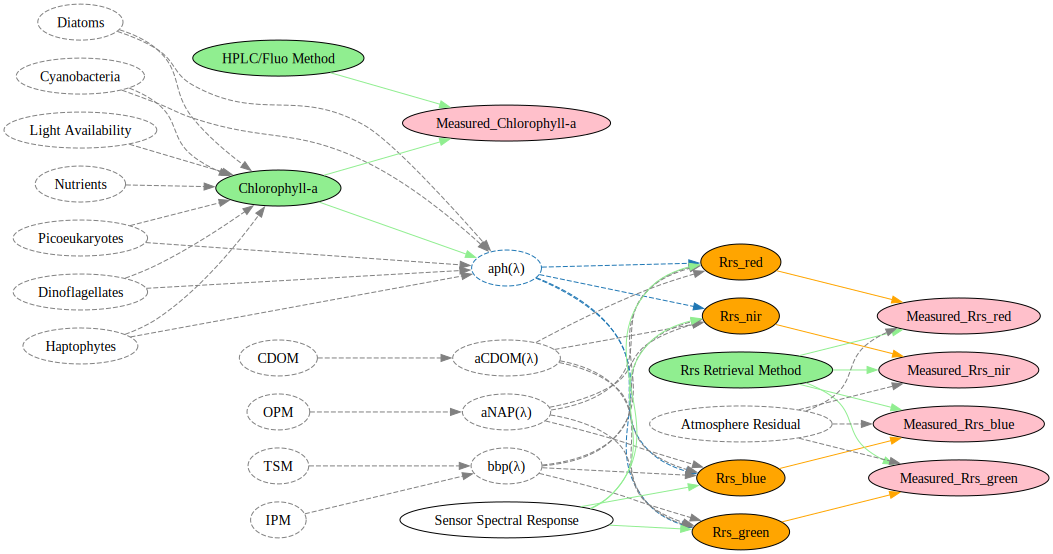

In [49]:
# Colors and styling
green = "lightgreen"
orange = "orange"
pink = "pink"
gray_latent = "gray"
blue_aph = "#1f77b4"

# Create g15
g15 = Digraph(name="Refined_Causal_Graph_g15", graph_attr={"rankdir": "LR", "splines": "true"})

# --- Nodes ---

# Latent phytoplankton groups
phyto = ['Diatoms', 'Cyanobacteria', 'Dinoflagellates', 'Haptophytes', 'Picoeukaryotes']
for pt in phyto:
    g15.node(pt, style="dashed", color=gray_latent)

# Observed Chl‑a & measured Chl‑a
g15.node("Chlorophyll-a", style="filled", fillcolor=green)
g15.node("Measured_Chlorophyll-a", style="filled", fillcolor=pink)
g15.node("HPLC/Fluo Method", style="filled", fillcolor=green)

# Latent biogeochemical & confounders
latent_bio = ["CDOM", "OPM", "IPM", "TSM", "Nutrients", "Light Availability"]
for node in latent_bio:
    g15.node(node, style="dashed", color=gray_latent)

# Latent optical properties (aph highlighted)
g15.node("aph(λ)", style="dashed", color=blue_aph)
for node in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
    g15.node(node, style="dashed", color=gray_latent)

# Generic Rrs colour bands (observed)
generic_rrs = ["Rrs_blue", "Rrs_green", "Rrs_red", "Rrs_nir"]
for band in generic_rrs:
    g15.node(band, style="filled", fillcolor=orange)

# Sensor node that determines exact wavelengths
#g15.node("Sensor Spectral Response", style="filled", fillcolor=green)

# Retrieval algorithm node
g15.node("Rrs Retrieval Method", style="filled", fillcolor=green)

# Measured Rrs nodes
for band in generic_rrs:
    g15.node(f"Measured_{band}", style="filled", fillcolor=pink)

# Atmosphere kept as latent residual after correction (still dashed)
g15.node("Atmosphere Residual", style="dashed", color=gray_latent)

# --- Helper to add edge ---
def edge(src, dst, dashed=False, color="black"):
    style = "dashed" if dashed else "solid"
    g15.edge(src, dst, style=style, color=color, penwidth="1")

# Causal edges

# Phytoplankton -> Chl‑a, aph
for pt in phyto:
    edge(pt, "Chlorophyll-a", dashed=True, color=gray_latent)
    edge(pt, "aph(λ)", dashed=True, color=gray_latent)

# Confounders -> Chl‑a
for conf in ["Nutrients", "Light Availability"]:
    edge(conf, "Chlorophyll-a", dashed=True, color=gray_latent)

# Chl‑a -> aph
edge("Chlorophyll-a", "aph(λ)", color=green)

# Chl‑a measurement path
edge("Chlorophyll-a", "Measured_Chlorophyll-a", color=green)
edge("HPLC/Fluo Method", "Measured_Chlorophyll-a", color=green)

# Biogeochemical -> optical
edge("CDOM", "aCDOM(λ)", dashed=True, color=gray_latent)
edge("OPM", "aNAP(λ)", dashed=True, color=gray_latent)
edge("IPM", "bbp(λ)", dashed=True, color=gray_latent)
edge("TSM", "bbp(λ)", dashed=True, color=gray_latent)

# Optical -> generic Rrs
for band in generic_rrs:
    edge("aph(λ)", band, dashed=True, color=blue_aph)
    for src in ["aCDOM(λ)", "aNAP(λ)", "bbp(λ)"]:
        edge(src, band, dashed=True, color=gray_latent)

# Sensor spectral response selects wavelength-specific measured bands
for band in generic_rrs:
    edge("Sensor Spectral Response", band, color=green)

# Generic Rrs -> measured Rrs
for band in generic_rrs:
    measured = f"Measured_{band}"
    edge(band, measured, color=orange)
    #edge("Sensor Spectral Response", measured, color=green)
    edge("Rrs Retrieval Method", measured, color=green)
    edge("Atmosphere Residual", measured, dashed=True, color=gray_latent)

# Export
# Export
fng15="g15_causal_graph.png"
g15.render(filename=fng15, format="pdf", cleanup=True)
g15.render(filename=fng15, format="png", cleanup=True)

g15
